01_data_exploration.ipynb
	
docs(readme): link core Habnetic repositories and clarify project int…
	
2 months ago
02_synthetic_generation.ipynb
	
docs(readme): link core Habnetic repositories and clarify project int…
	
2 months ago
03_model_definition.ipynb
	
docs(readme): link core Habnetic repositories and clarify project int…
	
2 months ago
04_inference_and_validation.ipynb
	
docs(readme): link core Habnetic repositories and clarify project int…
	
2 months ago
05_visualization.ipynb

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_ROOT = os.environ.get(
    "HABNETIC_DATA",
    r"C:\Users\C.Price\Habnetic\data"  # fallback for this machine
)

path = os.path.join(
    DATA_ROOT,
    "processed", "RTM", "priors", "building_water_proximity.parquet"
)

df = pd.read_parquet(path)

cols = [
    "dist_to_water_m",
    "water_len_density_250m",
    "water_len_density_500m",
    "water_len_density_1000m",
]

df[cols].describe(percentiles=[0.1, 0.5, 0.9])


,dist_to_water_m,water_len_density_250m,water_len_density_500m,water_len_density_1000m
count,221324.000000,221324.000000,221324.000000,221324.000000
mean,281.022760,0.000857,0.000946,0.000948
std,282.368610,0.001331,0.001021,0.000793
min,0.001866,0.000000,0.000000,0.000000
10%,57.866593,0.000000,0.000000,0.000100
50%,194.175579,0.000302,0.000678,0.000811
90%,609.539541,0.002568,0.002308,0.001922
max,2356.348035,0.025489,0.019409,0.018203


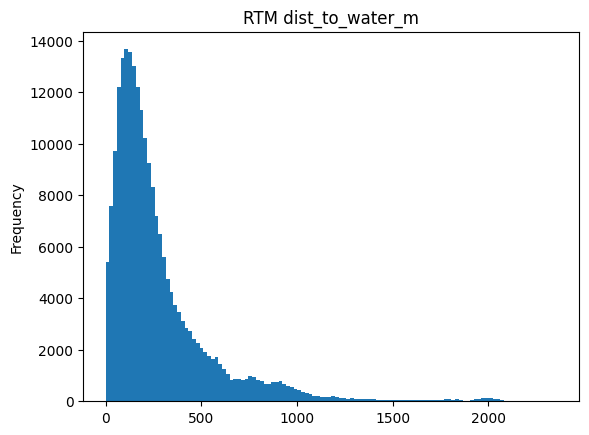

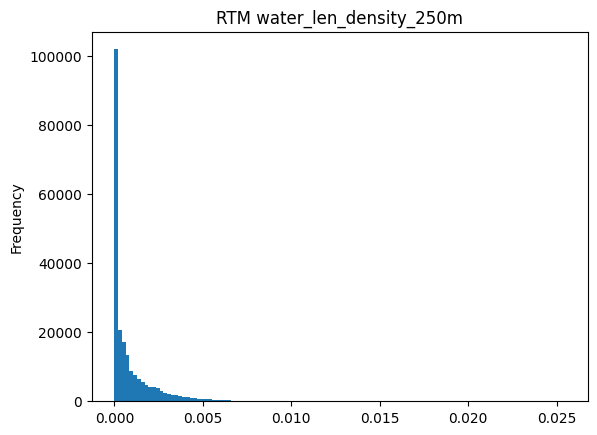

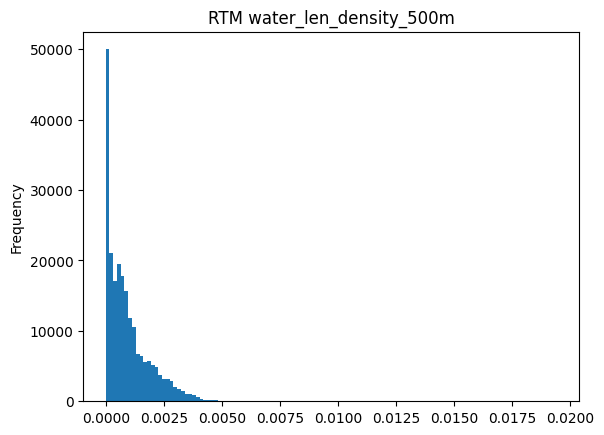

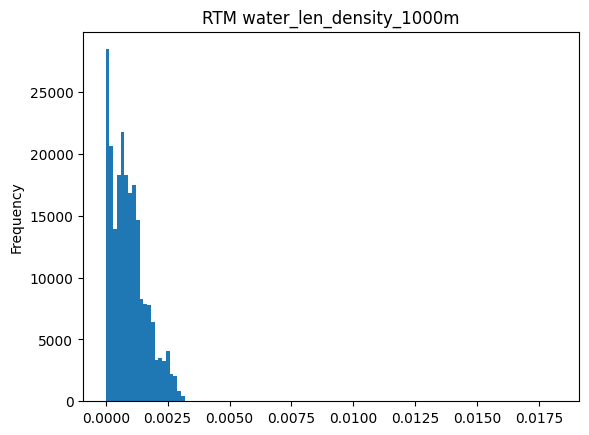

In [2]:
df["dist_to_water_m"].plot(kind="hist", bins=120)
plt.title("RTM dist_to_water_m")
plt.show()

for c in cols[1:]:
    df[c].plot(kind="hist", bins=120)
    plt.title(f"RTM {c}")
    plt.show()


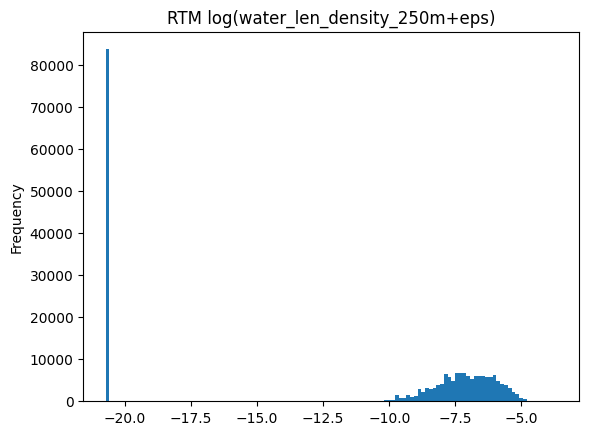

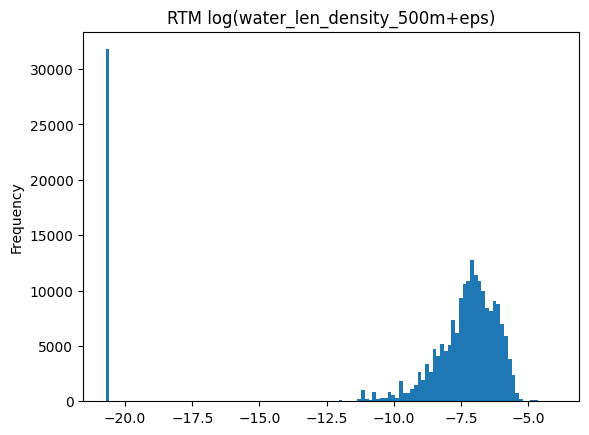

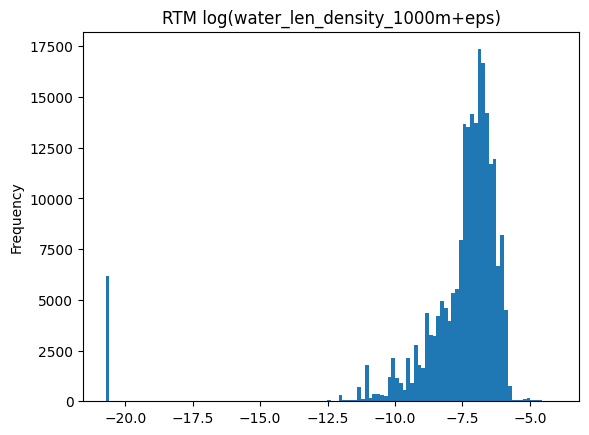

In [3]:
eps = 1e-9
for c in cols[1:]:
    np.log(df[c] + eps).plot(kind="hist", bins=120)
    plt.title(f"RTM log({c}+eps)")
    plt.show()


In [4]:
df[cols].corr()


,dist_to_water_m,water_len_density_250m,water_len_density_500m,water_len_density_1000m
dist_to_water_m,1.000000,-0.429305,-0.467227,-0.467389
water_len_density_250m,-0.429305,1.000000,0.782497,0.571797
water_len_density_500m,-0.467227,0.782497,1.000000,0.823801
water_len_density_1000m,-0.467389,0.571797,0.823801,1.000000


In [5]:
df[cols].quantile([0,0.1,0.25,0.5,0.75,0.9,0.99,1.0])


,dist_to_water_m,water_len_density_250m,water_len_density_500m,water_len_density_1000m
0.00,0.001866,0.000000,0.000000,0.000000
0.10,57.866593,0.000000,0.000000,0.000100
0.25,108.525921,0.000000,0.000207,0.000375
0.50,194.175579,0.000302,0.000678,0.000811
0.75,343.519480,0.001167,0.001350,0.001311
0.90,609.539541,0.002568,0.002308,0.001922
0.99,1461.110835,0.005804,0.003891,0.002856
1.00,2356.348035,0.025489,0.019409,0.018203
